In [1]:
import numpy as np
import pandas as pd

In [17]:
df

,registration_date,traffic_type,id_partner,age_group,device,country_tier,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt,CPA,return_rate,revenue
0,2021-06-24,Google Search,1,35-,iOS,Tier_1,60,220.0,2.99,5,3,1,3.666667,0.150000,2.99
1,2021-09-13,Google Search,1,35-,MacOS,Tier_1,8,0.0,0.00,0,0,0,0.000000,0.000000,0.00
2,2021-07-12,Google Search,1,35-55,Android,Tier_1,121,2550.0,225.97,28,19,11,21.074380,0.479339,225.97
3,2021-03-26,Google Search,1,35-55,iOS,Tier_1,95,1900.0,351.92,23,9,2,20.000000,0.357895,351.92
4,2021-04-26,Google Search,1,35-,Android,Tier_1,51,915.0,256.09,7,2,2,17.941176,0.215686,256.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48243,2021-01-09,Google Media,6,35-55,Other,Tier_1,15,90.0,0.00,1,1,1,6.000000,0.200000,0.00
48244,2021-07-19,Google Media,6,55+,Other,Tier_1,23,65.5,0.00,5,0,2,2.847826,0.304348,0.00
48245,2021-02-26,Google Media,6,55+,Other,Tier_1,29,194.0,0.00,2,3,2,6.689655,0.241379,0.00
48246,2021-09-22,Google Media,6,35-,Android,Tier_3,6,0.0,0.00,0,0,0,0.000000,0.000000,0.00


In [2]:
df = pd.read_csv('C:/Users/User/Desktop/python for DA/data/marketing_data-28347077.csv')

##  За якими показниками можна виміряти ефективність закупівлі кожним з партнерів? Які партнери є найкращими, найгіршими за цими показниками?
Для вимірювання ефективності закупівлі кожним з партнерів використаємо такі показники:

CPA - вартість однієї реєстрації. Цей показник розраховується як відношення суми, яку компанія заплатила партнеру за приведених користувачів, до загальної кількості реєстрацій за певний період часу. Чим нижче CPR, тим ефективніша закупівля.

RPU (revenue) - середня сума, яку приведені користувачі витрачають за перші 7 днів життя на платформі. Цей показник дозволяє оцінити прибутковість приведених користувачів. Чим вище RPU, тим більший дохід приносять користувачі, яких привів партнер.

Return rate - відсоток користувачів, які повернулися на платформу на певний час після реєстрації. Розглянемо три показники Retention Rate: logins_1_lt, logins_3_lt і logins_7_lt. Вони вказують, скільки користувачів повернулися на платформу на наступний день, на 3-й день і на 7-й день відповідно. Вищі значення цих показників свідчать про кращу утриманість користувачів і можуть вказувати на якість приведеної аудиторії.

Чим вищі значення CPR та Retention Rate, тим краще виконує свої обов'язки партнер і тим ефективніше його співпраця з компанією. Високі значення RPU також свідчать про високу якість приведеної аудиторії.

In [3]:
df['CPA'] = df['users_acqusition_costs'] / df['registrations']

In [4]:
df['return_rate'] = (df['logins_1_lt'] + df['logins_3_lt'] + df['logins_7_lt']) / df['registrations']

In [5]:
df['revenue'] = df['revenue_7_days']

In [6]:
partner_stats = df.groupby('id_partner').mean(numeric_only=True)

In [7]:
best_partner_cpa = partner_stats['CPA'].idxmin()
worst_partner_cpa = partner_stats['CPA'].idxmax()

best_partner_return = partner_stats['return_rate'].idxmax()
worst_partner_return = partner_stats['return_rate'].idxmin()

best_partner_revenue = partner_stats['revenue'].idxmax()
worst_partner_revenue = partner_stats['revenue'].idxmin()

In [8]:
print("Найкращий партнер за CPA:", best_partner_cpa)
print("Найгірший партнер за CPA:", worst_partner_cpa)

print("Найкращий партнер за поверненням на платформу:", best_partner_return)
print("Найгірший партнер за поверненням на платформу:", worst_partner_return)
print("Найкращий партнер за прибутком:", best_partner_revenue)
print("Найгірший партнер за прибутком:", worst_partner_revenue)

Найкращий партнер за CPA: 5
Найгірший партнер за CPA: 2
Найкращий партнер за поверненням на платформу: 1
Найгірший партнер за поверненням на платформу: 5
Найкращий партнер за прибутком: 4
Найгірший партнер за прибутком: 5


**Найкращий партнер за CPA - партнер 5, він має найнижше значення CPA, що свідчить про його ефективність в привабливості користувачів до платформи. Проте він являється найгіршим за прибутком, що скоріш за все свідчить про те, що він закликає неякісну аудиторію. Він також являється найгіршим за показником повернення на платформу,  що вказує на його низьку ефективність у залученні та утриманні користувачів на платформі.**

**Найгірший партнер за CPA - партнер 2 має найвище значення CPA, що вказує на його низьку ефективність в привабливості користувачів до платформи. Це означає, що компанія витрачає більше коштів на приведення нових користувачів за допомогою цього партнера порівняно з іншими.**

**Найкращий партнер за поверненням на платформу - партнер 1 має найвищу кількість повернутих користувачів на платформу, що свідчить про його високу ефективність у залученні активних користувачів, які повертаються для використання платформи після реєстрації.**

**Найкращий партнер за прибутком -партнер 4 має найвищий рівень прибутку, що свідчить про його успішність у залученні користувачів, які генерують значний дохід для компанії. Це може бути результатом високої якості аудиторії, яку приводить цей партнер, або ефективної роботи самого партнера у залученні.**

## Яка аудиторія є найбільш цільовою для компанії? Надайте рекомендації партнерам щодо того,яку аудиторію їм варто закуповувати

Найбільш цільова аудиторія: 35-55
Партнерам рекомендовано залучати аудиторію віком від 35 до 55 років.

In [20]:
age_group = df['age_group'].unique()

print("age_group:")
for age_group in age_group:
    print(age_group)

age_group:
35-
35-55
55+
nan


In [21]:
audience_age = df['age_group'].value_counts()
print(audience_age)

target_audience = audience_age.idxmax()
print("Найбільш цільова аудиторія:", target_audience)

if target_audience == '35-':
    print("Партнерам рекомендовано залучати аудиторію віком до 35 років.")
elif target_audience == '35-55':
    print("Партнерам рекомендовано залучати аудиторію віком від 35 до 55 років.")
elif target_audience == '55+':
    print("Партнерам рекомендовано залучати аудиторію віком 55+.")
else:
    print("Відсутня достатня інформація для рекомендацій партнерам щодо аудиторії.")

35-55    17066
55+      15692
35-      15488
Name: age_group, dtype: int64
Найбільш цільова аудиторія: 35-55
Партнерам рекомендовано залучати аудиторію віком від 35 до 55 років.


## Як між джерелами трафіку і партнерами варто розподілити нові маркетингові бюджети?

In [47]:
import matplotlib.pyplot as plt

**3.1 
Як розподіляються реєстрації за кожним каналом трафіку та партнером?**

In [57]:
registrations_by_traffic_partner = df.groupby(['traffic_type', 'id_partner'])['registrations'].sum()
registrations_by_traffic_partner

traffic_type   id_partner
Facebook       3             310843
               4             431526
Google Media   5             749426
               6             837235
Google Search  1             217271
               2             161962
Name: registrations, dtype: int64

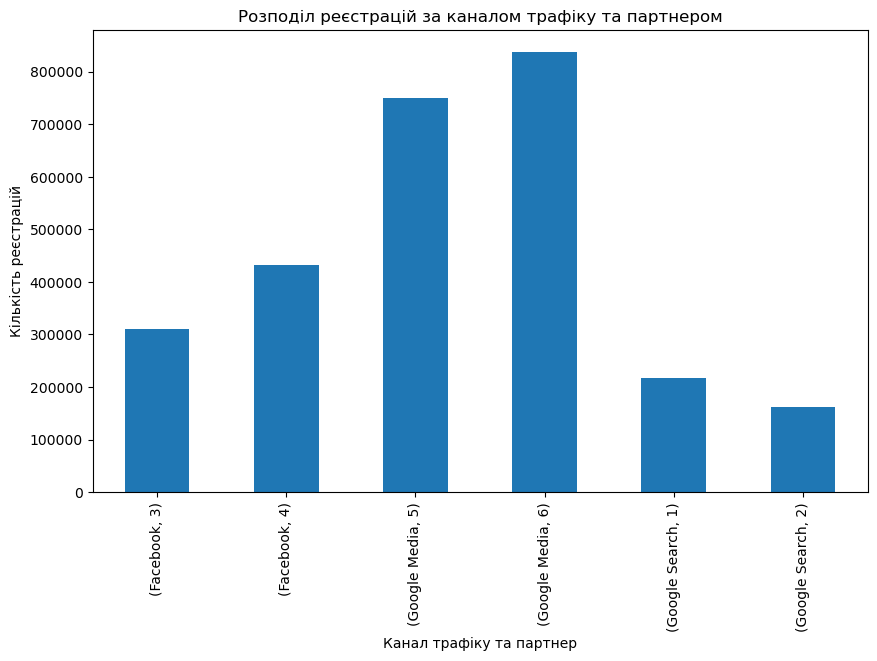

In [48]:
registrations_by_traffic_partner.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Канал трафіку та партнер')
plt.ylabel('Кількість реєстрацій')
plt.title('Розподіл реєстрацій за каналом трафіку та партнером')
plt.show()

**3.2 Які канали трафіку та партнери принесли найбільше прибутку?**

In [58]:
revenue_by_traffic_partner = df.groupby(['traffic_type', 'id_partner'])['revenue_7_days'].sum()
revenue_by_traffic_partner

traffic_type   id_partner
Facebook       3              870,313.01
               4              788,895.90
Google Media   5              170,339.74
               6              302,755.92
Google Search  1            1,341,136.70
               2              525,264.02
Name: revenue_7_days, dtype: float64

**Прибуток за останні 7 днів показує, що найбільший прибуток отримується від каналу трафіку "Google Search" та партнера 1 (1,341,136.70), після нього йде канал трафіку "Facebook" та партнер 3 (870,313.01).**

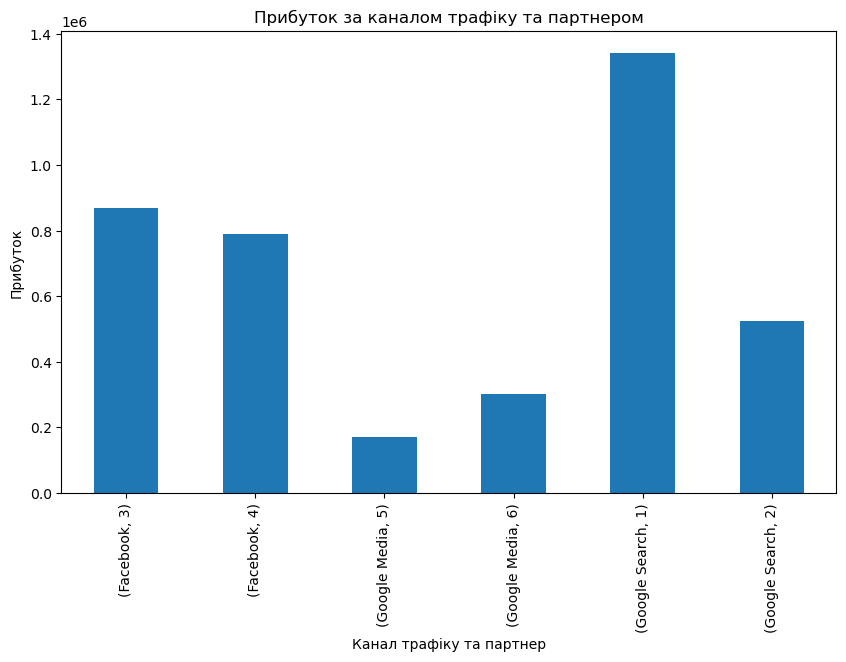

In [50]:
revenue_by_traffic_partner.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Канал трафіку та партнер')
plt.ylabel('Прибуток')
plt.title('Прибуток за каналом трафіку та партнером')
plt.show()

**3.3 Які канали трафіку та партнери вимагають найбільше витрат на залучення користувачів?**

In [59]:
costs_by_traffic_partner = df.groupby(['traffic_type', 'id_partner'])['users_acqusition_costs'].sum()
costs_by_traffic_partner

traffic_type   id_partner
Facebook       3            4,246,838.61
               4            5,982,619.26
Google Media   5            1,989,379.75
               6            2,316,402.84
Google Search  1            5,205,538.15
               2            4,877,356.93
Name: users_acqusition_costs, dtype: float64

**Витрати на залучення користувачів показують, що найбільші витрати спостерігаються у каналу трафіку "Facebook" та партнера 4 (5,982,619.26), за ним йде канал трафіку "Google Media" та партнера 5 (1,989,379.75).**

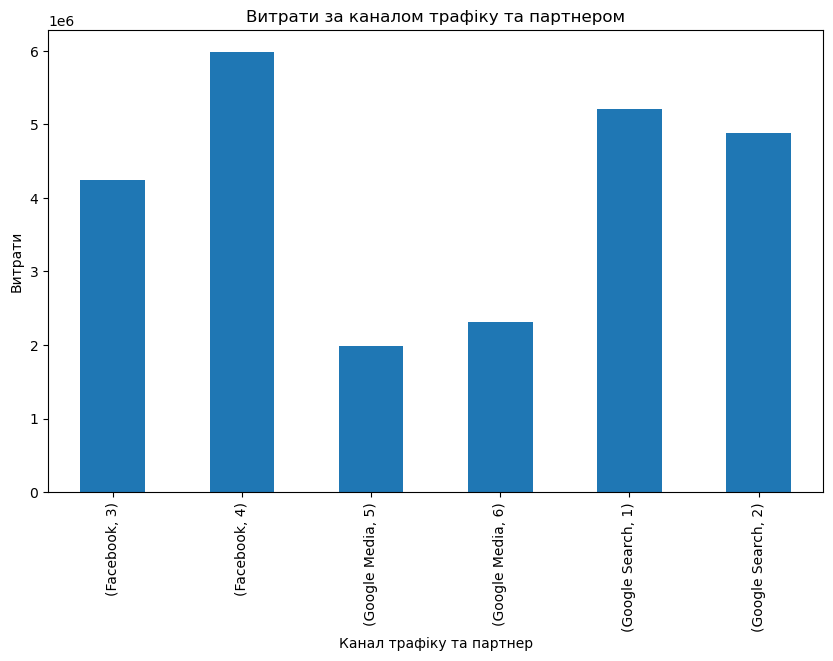

In [51]:
costs_by_traffic_partner.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Канал трафіку та партнер')
plt.ylabel('Витрати')
plt.title('Витрати за каналом трафіку та партнером')
plt.show()

**3.4 Які канали трафіку та партнери мають найвищий відсоток повернених користувачів на різних етапах (наприклад, повернення наступного дня після реєстрації)?**

In [61]:
df['logins_1_lt_percent'] = df['logins_1_lt'] / df['registrations']
logins_1_lt_percent_by_traffic_partner = df.groupby(['traffic_type', 'id_partner'])['logins_1_lt_percent'].mean()
logins_1_lt_percent_by_traffic_partner

traffic_type   id_partner
Facebook       3            0.19
               4            0.18
Google Media   5            0.12
               6            0.13
Google Search  1            0.20
               2            0.19
Name: logins_1_lt_percent, dtype: float64

**Відсоток повернених користувачів на наступний день після реєстрації свідчить, що найвищий показник спостерігається у каналу трафіку "Google Search" та партнера 1 (20%), а також у каналу трафіку "Facebook" та партнера 3 (19%).**

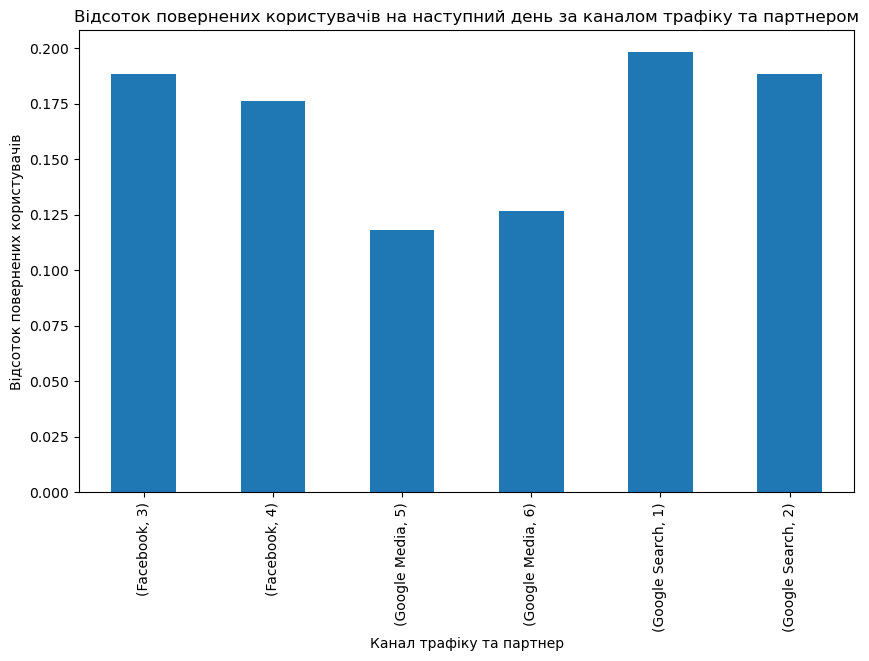

In [52]:
logins_1_lt_percent_by_traffic_partner.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Канал трафіку та партнер')
plt.ylabel('Відсоток повернених користувачів')
plt.title('Відсоток повернених користувачів на наступний день за каналом трафіку та партнером')
plt.show()

З урахуванням цих висновків, компанія може розподілити маркетингові бюджети таким чином:

Канал трафіку "Google Search" та партнер 1 показують найкращі результати за всіма показниками (високий прибуток, найвищий відсоток повернених користувачів). Тому рекомендується збільшити бюджет для цього каналу та партнера, щоб максимізувати прибуток.

Канал трафіку "Facebook" та партнер 3 також показують добрі результати (високий прибуток, непоганий відсоток повернених користувачів), але витрати на залучення користувачів є досить великими. Рекомендується провести додатковий аналіз витрат та оптимізувати стратегію маркетингу для зменшення витрат при збереженні прибутку.

Канал трафіку "Google Media" та партнер 5 мають менший прибуток порівняно з іншими каналами, але також витрати на залучення користувачів в цьому каналі є меншими. Рекомендується зберігати частину бюджету для цього каналу, оскільки він може приводити потенційних користувачів з низьшими витратами.

Канал трафіку "Facebook" та партнер 4 мають великі витрати на залучення користувачів, але приносять менший прибуток порівняно з іншими каналами. Варто розглянути можливість оптимізації витрат або перегляду стратегії співпраці з цим партнером.